<a href="https://colab.research.google.com/github/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/02_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 
<strong> 
    <h1 align='center'>Hierarchical Clustering</h1> 
</strong>

---


In [ ]:
! git clone https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python.git

Cloning into 'CAREER-TRACK-Data-Scientist-with-Python'...
remote: Enumerating objects: 434, done.
remote: Counting objects: 100% (434/434), done.
remote: Compressing objects: 100% (381/381), done.
remote: Total 2620 (delta 159), reused 278 (delta 48), pack-reused 2186
Receiving objects: 100% (2620/2620), 331.74 MiB | 37.23 MiB/s, done.
Resolving deltas: 100% (937/937), done.
Checking out files: 100% (1082/1082), done.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#plt.style.use('ggplot')
sns.set_theme()
%matplotlib inline

In [ ]:
os.chdir('/content/CAREER-TRACK-Data-Scientist-with-Python/30_Cluster-Analysis-in-Python/_dataSet')
cwd = os.getcwd()
print('Curent working directory is ', cwd)

Curent working directory is  /content/CAREER-TRACK-Data-Scientist-with-Python/30_Cluster-Analysis-in-Python/_dataSet


In [ ]:
ls

CAREER-TRACK-Data-Scientist-with-Python/  fifa_18_sample_data.csv
comic_con.csv                             movies_plot.csv
fifa_18_dataset.csv


## **Basics of hierarchical clustering**

A critical step is to compute the **distance matrix** at each stage. This is achieved through the **linkage** method. This process computes the distances between clusters as we go from $N \rightarrow 1$ **cluster**, where $N$ is the number of points.

### __`linkage`__
```python
scipy.cluster.hierarchy.linkage(observations,
                                method='single',
                                metric='euclidean',
                                optimal_ordering=False)
```
- The **first** parameter is the **observations**.
- The **method** parameter, tells the algorithm *how to calculate proximity between two clusters*.
    - *Type of Methods*
        - `'single`: based on two closest objects
        - `'complete'`: based on two farthest objects
        - `'average'`: based on the arithmetic mean of all objects
        - `'centroids'`: based on the geometric mean of all objects
        - `'median'`: based on the median of all objects
        - `'ward'`: based on the sum of squares

- The **metric** is the function that decides the *distance between two objects*.
- The **optimal_ordering** is an optional argument that *changes the order of linkage matrix*.

- Creating a distance matrix using linkage
    - `method`: how to calculate the proximity of clusters

### __`fcluster`__

```python
scipy.cluster.hierarchy.fcluster(distance_matrix, num_clusters, criterion)
```
- `distance_matrix` : output of `linkage()` method
- `num_clusters` : number of clusters
- `criterion` : how to decide thresholds to form clusters
    

### Hierarchical clustering: `'ward'` method

It is time for Comic-Con! Comic-Con is an annual comic-based convention held in major cities in the world. You have the data of last year's footfall, the number of people at the convention ground at a given time. You would like to decide the location of your stall to maximize sales. Using the ward method, apply hierarchical clustering to find the two points of attraction in the area.

In [ ]:
comic_con = pd.read_csv('comic_con.csv', index_col=0)
comic_con.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled,cluster_labels
0,17.0,4.0,0.509349,0.090010,2
1,20.0,6.0,0.599234,0.135015,2
2,35.0,0.0,1.048660,0.000000,2
3,14.0,0.0,0.419464,0.000000,2
4,37.0,4.0,1.108583,0.090010,2


In [ ]:
comic_con['cluster_labels'].value_counts()

2    21
1    15
Name: cluster_labels, dtype: int64

In [ ]:
from scipy.cluster.vq import whiten

comic_con['x_scaled'] = whiten(comic_con['x_coordinate'])
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])

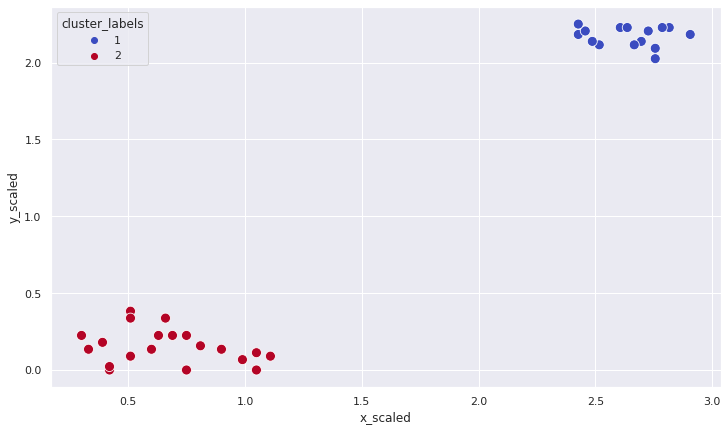

In [ ]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage()
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']],
                          method='ward',
                          metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix,
                                       t=2,
                                       criterion='maxclust')

# plot size
plt.figure(figsize=(12, 7))

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels',
                palette='coolwarm',
                s=100,
                data=comic_con)
plt.show()

### Hierarchical clustering: `'single'` method
Let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.

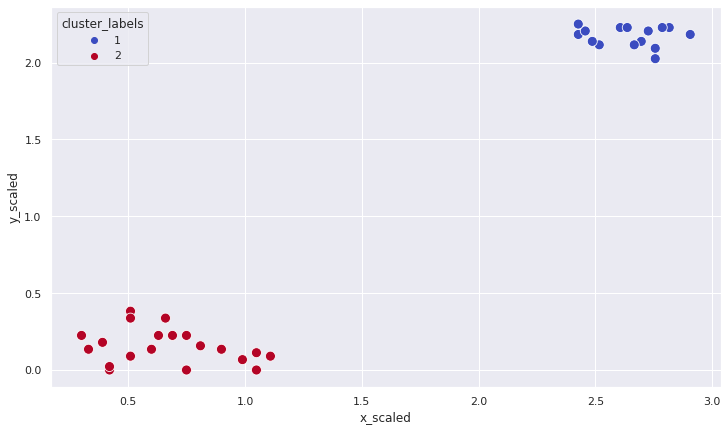

In [ ]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage()
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']],
                          method='single',
                          metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix,
                                       t=2,
                                       criterion='maxclust')

# plot size
plt.figure(figsize=(12, 7))

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels',
                palette='coolwarm',
                s=100,
                data=comic_con)

### Hierarchical clustering: `'complete'` method
For the third and final time, let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.



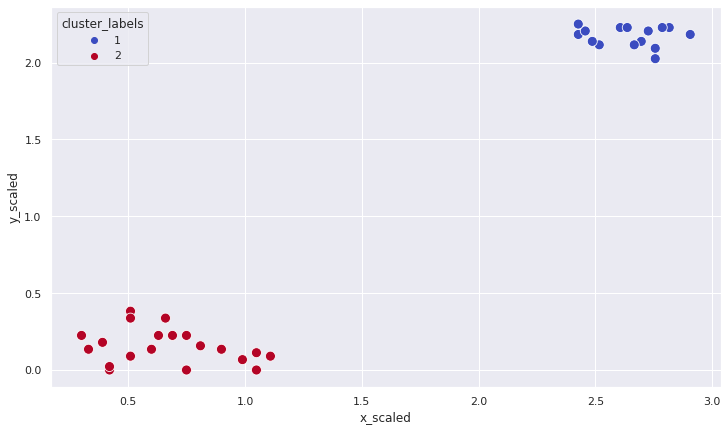

In [ ]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage()
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']],
                          method='complete',
                          metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix,
                                       t=2,
                                       criterion='maxclust')

# plot size
plt.figure(figsize=(12, 7))

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels',
                palette='coolwarm',
                s=100,
                data=comic_con)

## Visualize clusters
- Why visualize clusters?
    - Try to make sense of the clusters formed
    - An additional step in validation of clusters
    - Spot trends in data

### Visualize clusters with matplotlib
We have discussed that visualizations are necessary to assess the clusters that are formed and spot trends in your data. Let us now focus on visualizing the footfall dataset from Comic-Con using the matplotlib module.

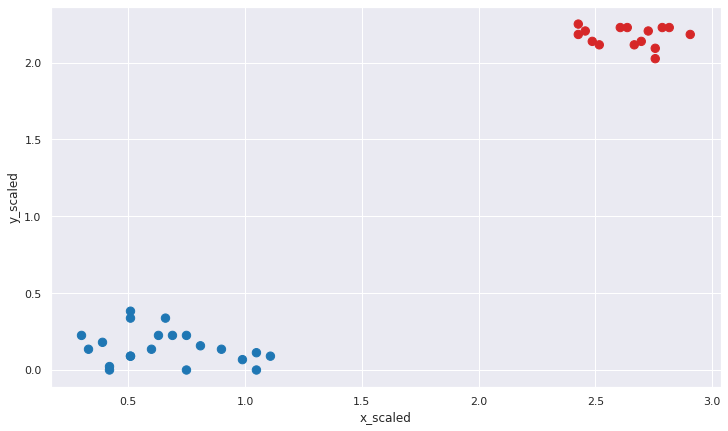

In [ ]:
# Define a colors dictionary for clusters
colors = {1:'tab:red', 2:'tab:blue'}

# Plot the scatter plot
comic_con.plot.scatter(x='x_scaled', y='y_scaled',
                       figsize=(12, 7), s=70,
                       c=comic_con['cluster_labels'].apply(lambda x: colors[x]))

plt.show()

### Visualize clusters with seaborn
Let us now visualize the footfall dataset from Comic Con using the seaborn module. Visualizing clusters using seaborn is easier with the inbuild ```hue``` function for cluster labels.

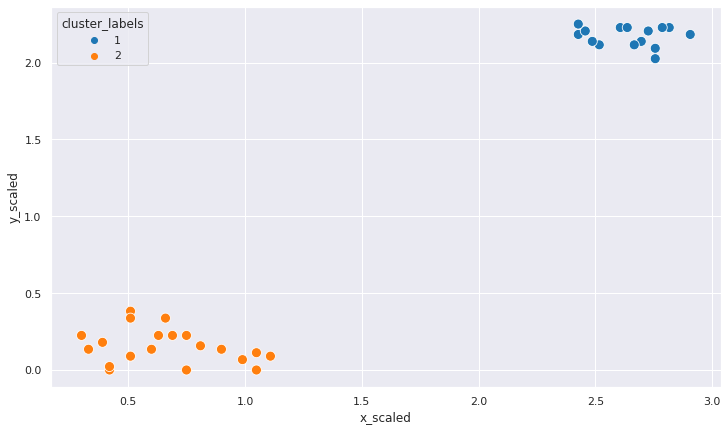

In [ ]:
# plot size
plt.figure(figsize=(12, 7))

# Plot a scatter plot using seaborn
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels', palette='tab10',
                s=100, data=comic_con)

## How many clusters?
- Introduction to dendrograms
    - Strategy till now - decide clusters on visual inspection
    - Dendrograms help in showing progressions as clusters are merged
    - A dendrogram is a branching diagram that demonstrates how each cluster is composed by branching out into its child nodes

### Create a dendrogram
Dendrograms are branching diagrams that show the merging of clusters as we move through the distance matrix. Let us use the Comic Con footfall data to create a dendrogram.



(array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
        135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255,
        265, 275, 285, 295, 305, 315, 325, 335, 345, 355]),
 <a list of 36 Text major ticklabel objects>)

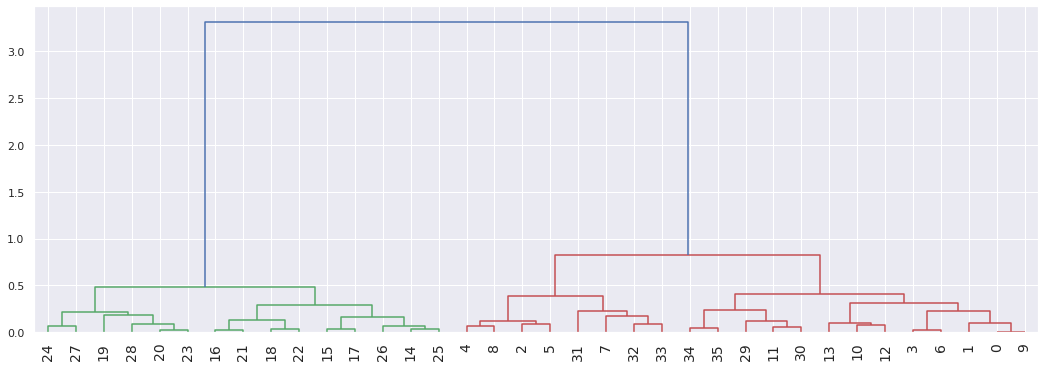

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram

# Use the linkage()
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']],
                          method='complete',
                          metric='euclidean')
# plot size
plt.figure(figsize=(18, 6))

# Create a dendrogram
dn = dendrogram(distance_matrix)
plt.xticks(fontsize=14, rotation=90)

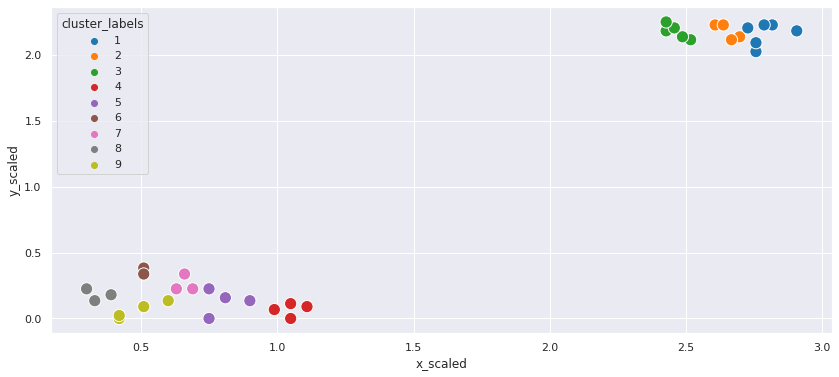

In [ ]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage()
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']],
                          method='complete',
                          metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix,
                                       t=9,
                                       criterion='maxclust')

# plot size
plt.figure(figsize=(14, 6))

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels',
                palette='tab10',
                s=150,
                data=comic_con)

### Limitations of hierarchical clustering
- Comparison of runtime of linkage method
    - Increasing runtime with data points
    - Quadratic increase of runtime
    - Not feasible for large datasets

### Timing run of hierarchical clustering
In earlier exercises of this chapter, you have used the data of Comic-Con footfall to create clusters. In this exercise you will time how long it takes to run the algorithm on DataCamp's system.

Remember that you can time the execution of small code snippets with:

>[`timeit`](https://www.geeksforgeeks.org/timeit-python-examples/)

```python
%timeit sum([1, 3, 2])
```

In [ ]:
%timeit sum([1, 3, 2])

The slowest run took 12.18 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 5: 135 ns per loop


In [ ]:
from scipy.cluster.hierarchy import linkage
import pandas as pd
import random, timeit

points = 100
df = pd.DataFrame({'x': random.sample(range(0, points), points),
'y': random.sample(range(0, points), points)})
%timeit linkage(df[['x', 'y']], method = 'ward', metric = 'euclidean')


In [ ]:
%timeit linkage(comic_con[['x_scaled', 'y_scaled']], method='ward', metric='euclidean')

1000 loops, best of 5: 596 µs per loop


>If you plot the **runtime** of the linkage method with the number of points, you can see that the **runtime increases with the increase in number of data points**. In addition to it, the **increase** in run time is** not linear** with respect to the increase in data points, but **quadratic**. ***This makes the technique of hierarchical clustering infeasible for huge number of data points***

### FIFA 18: exploring defenders
In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

- sliding tackle: a number between 0-99 which signifies how accurate a player is able to perform sliding tackles
- aggression: a number between 0-99 which signifies the commitment and will of a player
These are typically high in defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.

This data consists of 5000 rows, and is considerably larger than earlier datasets. Running hierarchical clustering on this data can take up to 10 seconds.

- Preprocess

In [ ]:
fifa = pd.read_csv('fifa_18_dataset.csv')
fifa.head()

,sliding_tackle,aggression
0,23,63
1,26,48
2,33,56
3,38,78
4,11,29


#### `method='ward'`

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            0.987373           1.849142
2                            3.013487           4.063492
3                            1.934455           3.210802


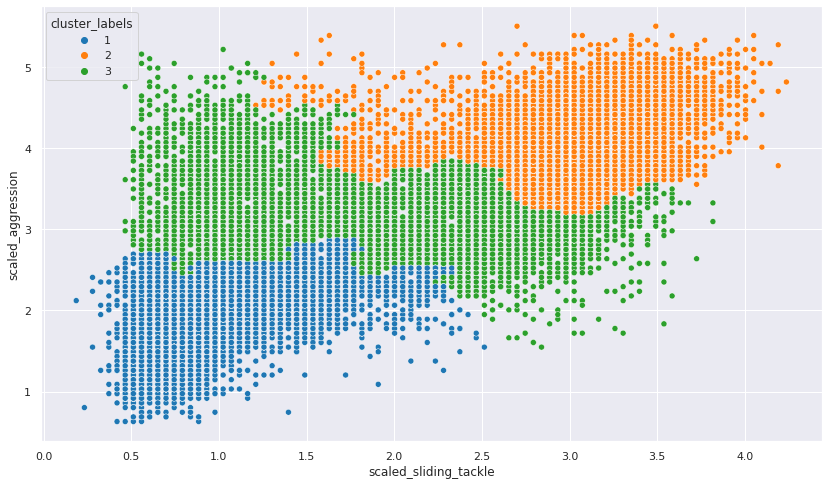

In [ ]:
from scipy.cluster.vq import whiten
from scipy.cluster.hierarchy import linkage, fcluster

fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])

# Fit the data into a hierarchical cluster
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], method='ward')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix,
                                  t=3,
                                  criterion='maxclust')

# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

# plot size
plt.figure(figsize=(14, 8))

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle',
                y='scaled_aggression',
                hue='cluster_labels',
                palette='tab10',
                data=fifa)

#### `method='single'`

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            3.538706           1.833273
2                            2.122738           3.198669
3                            1.396858           0.744767


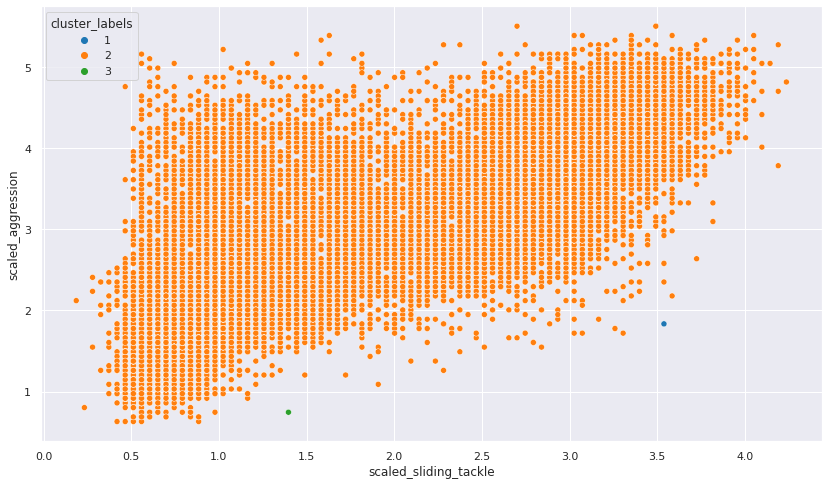

In [ ]:
from scipy.cluster.vq import whiten
from scipy.cluster.hierarchy import linkage, fcluster

fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])

# Fit the data into a hierarchical cluster
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], method='single')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix,
                                  t=3,
                                  criterion='maxclust')

# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

# plot size
plt.figure(figsize=(14, 8))

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle',
                y='scaled_aggression',
                hue='cluster_labels',
                palette='tab10',
                data=fifa)

#### `method='complete'`

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            1.366589           2.146912
2                            3.039758           3.876748
3                            1.570269           3.811188


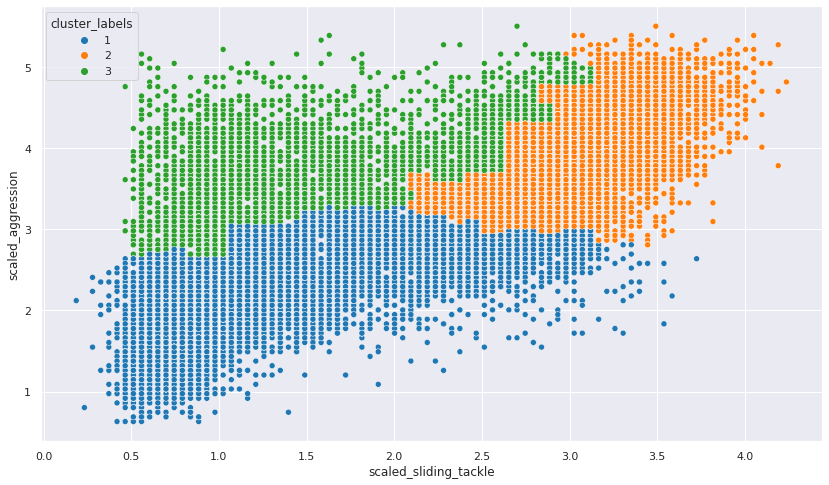

In [ ]:
from scipy.cluster.vq import whiten
from scipy.cluster.hierarchy import linkage, fcluster

fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])

# Fit the data into a hierarchical cluster
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], method='complete')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix,
                                  t=3,
                                  criterion='maxclust')

# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

# plot size
plt.figure(figsize=(14, 8))

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle',
                y='scaled_aggression',
                hue='cluster_labels',
                palette='tab10',
                data=fifa)

#### `method='median'`

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            1.287842           1.688407
2                            3.129338           4.152298
3                            1.737853           2.991324


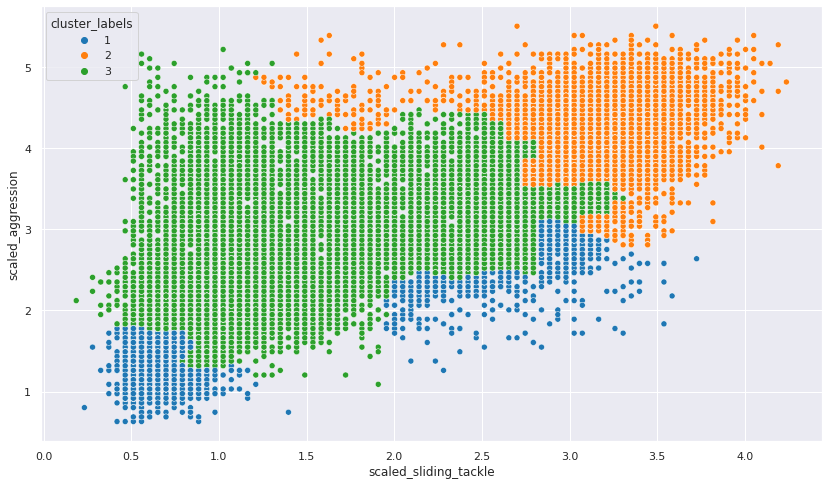

In [ ]:
from scipy.cluster.vq import whiten
from scipy.cluster.hierarchy import linkage, fcluster

fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])

# Fit the data into a hierarchical cluster
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], method='median')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix,
                                  t=3,
                                  criterion='maxclust')

# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

# plot size
plt.figure(figsize=(14, 8))

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle',
                y='scaled_aggression',
                hue='cluster_labels',
                palette='tab10',
                data=fifa)

#### `method='centroids'`

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            1.064491           1.943009
2                            1.300280           3.627597
3                            2.932006           3.761944


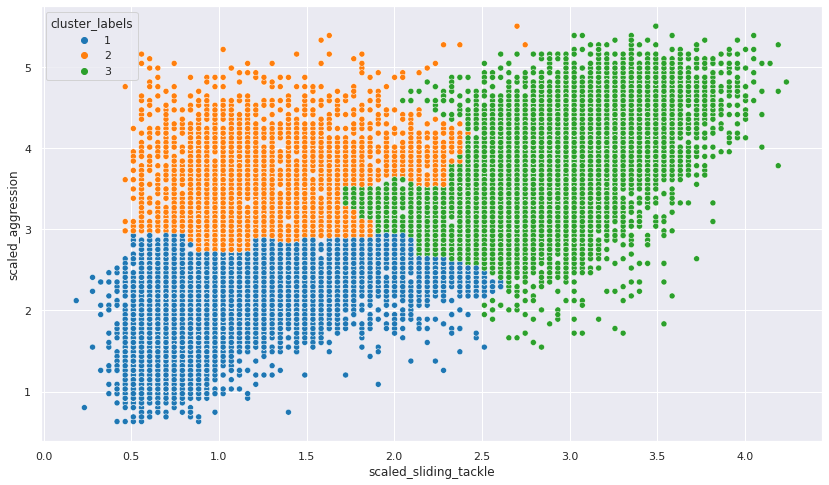

In [ ]:
from scipy.cluster.vq import whiten
from scipy.cluster.hierarchy import linkage, fcluster

fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])

# Fit the data into a hierarchical cluster
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], method='centroid')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix,
                                  t=3,
                                  criterion='maxclust')

# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

# plot size
plt.figure(figsize=(14, 8))

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle',
                y='scaled_aggression',
                hue='cluster_labels',
                palette='tab10',
                data=fifa)

<p align='center'>
    <a href='#'><img src='https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/30_Cluster-Analysis-in-Python/_img/cluster.png?raw=true'></a>
</p>

<p align='center'> 
    <a href="https://twitter.com/F4izy"> 
        <img src="https://th.bing.com/th/id/OIP.FCKMemzqNplY37Jwi0Yk3AHaGl?w=233&h=207&c=7&o=5&pid=1.7" width=50px 
            height=50px> 
    </a> 
    <a href="https://www.linkedin.com/in/mohd-faizy/"> 
        <img src='https://th.bing.com/th/id/OIP.idrBN-LfvMIZl370Vb65SgHaHa?pid=Api&rs=1' width=50px height=50px> 
    </a> 
</p>